In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
reduced = pd.read_csv("../data/reduced.csv")

In [5]:
reduced = reduced.drop(columns = reduced.columns[0])
reduced.head()

,scores,predscores,tmhalfsc,opphalfsc,patt,ypa,comppct,int,ratt,ypr,sacks,sackyds,fum,fuml
0,4.000000,24.75,6,13,19,6.736842,0.578947,2,8,1.500000,2,-11,0,0
1,6.164414,24.75,10,7,25,7.000000,0.640000,0,13,3.384615,1,-6,1,0
2,4.472136,17.75,13,10,11,4.272727,0.636364,0,15,3.466667,2,-10,2,0
3,2.645751,24.75,0,10,15,5.466667,0.666667,0,10,2.200000,0,0,1,1
4,3.741657,25.50,7,6,21,8.333333,0.714286,1,15,2.733333,1,-7,1,1


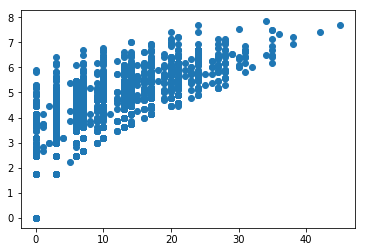

In [6]:
plt.scatter(reduced.tmhalfsc, reduced.scores)

In [7]:
base_X = reduced.drop(columns="scores")
base_y = reduced["scores"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(base_X, base_y, test_size=0.25)

In [9]:
base_lm = LinearRegression()
base_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
base_lm_r2 = base_lm.score(X_test, y_test)

In [11]:
base_lm_pred = base_lm.predict(X_test)

In [12]:
def rmse(pred, y):
    n = len(y)
    RMSE = sqrt(sum((pred - y)**2) / n)
    return RMSE

In [13]:
base_lm_RMSE = rmse(base_lm_pred, y_test)

In [14]:
print(f"Baseline Linear Regression RMSE: {base_lm_RMSE:.3f}")

Baseline Linear Regression RMSE: 0.838


In [15]:
print(f"Baseline Linear Regression R^2: {base_lm_r2:.3f}")

Baseline Linear Regression R^2: 0.539


In [16]:
"""Hand Picked Variables from R:
predscores+tmhalfsc+patt+ypa+ratt+ypr+sackyds"""
manual = reduced[["scores", "predscores", "tmhalfsc", "patt", "ypa", "ratt", "ypr", "sackyds"]]

In [17]:
man_X = manual.drop(columns="scores")
man_y = manual["scores"]

In [18]:
man_X_train, man_X_test, man_y_train, man_y_test = train_test_split(man_X, man_y, test_size=0.25)

In [19]:
man_lm = LinearRegression(normalize=True)
man_lm.fit(man_X_train, man_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
man_lm_pred = man_lm.predict(man_X_test)

In [21]:
man_lm_RMSE = rmse(man_lm_pred, man_y_test)
man_lm_r2 = man_lm.score(man_X_test, man_y_test)

In [22]:
print(f"Manual Linear Regression RMSE: {man_lm_RMSE:.4f}")

Manual Linear Regression RMSE: 0.7799


In [23]:
print(f"Manual Linear Regression R^2: {man_lm_r2:.4f}")

Manual Linear Regression R^2: 0.5489


In [24]:
coef_values = man_lm.coef_
man_cols = list(man_X.columns)
coefs = list(zip(man_cols, coef_values))

In [25]:
coefs

[('predscores', 0.05347112359754262),
 ('tmhalfsc', 0.1075431115562931),
 ('patt', 0.008008947061699075),
 ('ypa', 0.019732970767587156),
 ('ratt', -0.010771997639564582),
 ('ypr', 0.021937878015044588),
 ('sackyds', 0.007337891214029631)]

In [26]:
bag_lm = LinearRegression()
bag = BaggingRegressor(bag_lm, bootstrap=True, n_estimators=10)

In [27]:
bag.fit(man_X_train, man_y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [29]:
bag_pred = bag.predict(man_X_test)
bag_RMSE = rmse(bag_pred, man_y_test)
bag_r2 = bag.score(man_X_test, man_y_test)

In [30]:
bag_RMSE

0.7793265851232377

In [31]:
bag_r2

0.5495361522643647

In [32]:
bag_gs = BaggingRegressor(bag_lm)
search = {"n_estimators":np.arange(1,6,1), "max_samples":np.arange(0.55, 0.65, 0.01), 
          "bootstrap":[True, False]}
gs = GridSearchCV(bag_gs, search, cv=5)
gs.fit(man_X_train, man_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5]), 'max_samples': array([0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64]), 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
gs.best_params_

{'bootstrap': True, 'max_samples': 0.56, 'n_estimators': 2}

In [34]:
gs.best_estimator_

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.56, n_estimators=2, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [35]:
gs_pred = gs.best_estimator_.predict(man_X_test)
rmse(gs_pred, man_y_test)

0.7826220709948586

In [36]:
gs.best_estimator_.score(man_X_test, man_y_test)

0.5457184050680663

## Cross Validation Visualization

In [240]:
reset -fs

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [242]:
reduced = pd.read_csv("../data/reduced.csv")

In [243]:
reduced = reduced.drop(columns = reduced.columns[0])

In [244]:
X = reduced.drop(columns="scores")
y = reduced["scores"]

In [245]:
lr = LinearRegression()

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25)

In [255]:
train_size, train_scores, valid_scores = learning_curve(estimator=lr, X=X_train, y=y_train, 
                                                        train_sizes=np.arange(0.75, 1.0, 0.01), cv=10)

In [256]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

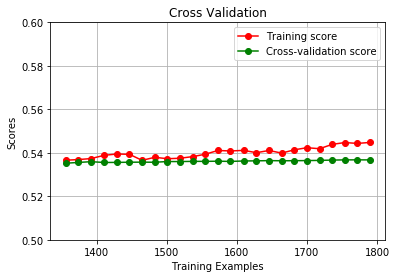

In [257]:
plt.figure()
plt.title("Cross Validation")
plt.xlabel("Training Examples")
plt.ylabel("Scores")
plt.grid()
plt.plot(train_size, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_size, valid_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.ylim(0.5, 0.6)
plot = plt.legend(loc="best")

## Transformation of tmhalfsc

In [5]:
reset -fs

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
reduced = pd.read_csv("../data/reduced.csv")
reduced = reduced.drop(columns = reduced.columns[0])

In [8]:
X = reduced.drop(columns="scores")
y = reduced["scores"]

In [9]:
tmhalf = np.array(X.tmhalfsc)

In [10]:
sqrt_tmhalf = np.sqrt(tmhalf)
log_tmhalf = []
for i in range(len(tmhalf)):
    if tmhalf[i] != 0:
        log_tmhalf.append(np.log(tmhalf[i]))
    else:
        log_tmhalf.append(tmhalf[i])

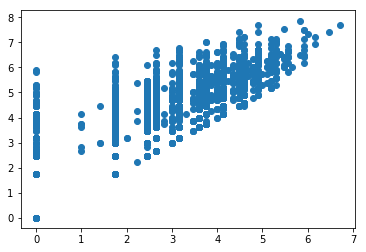

In [11]:
plt.scatter(sqrt_tmhalf, y)

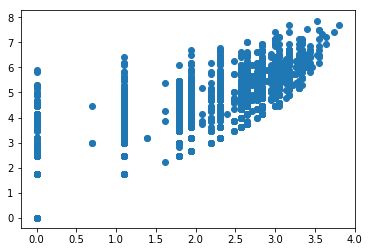

In [12]:
plt.scatter(log_tmhalf, y)

In [13]:
X = X.drop(columns="tmhalfsc")
X["tmhalfsc"] = sqrt_tmhalf
# X["tmhalfsc"] = log_tmhalf

In [14]:
def rmse(pred, y):
    n = len(y)
    RMSE = np.sqrt(sum((pred - y)**2) / n)
    return RMSE

In [26]:
rmse_scores = []
r2_scores = []
rand_state = range(1,1000)
for i in rand_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr = LinearRegression().fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2_scores.append(lr.score(X_test, y_test))
    rmse_scores.append(rmse(pred, y_test))

In [27]:
scores = list(zip(rand_state, rmse_scores, r2_scores))

In [28]:
best_state = sorted(scores, key=lambda x: x[1])[0]
print("Models sorted on RMSE ascending:")
print(f"Random State: {best_state[0]}")
print(f"RMSE: {best_state[1]:.4f}")
print(f"R^2: {best_state[2]:.4f}")

Models sorted on RMSE ascending:
Random State: 69
RMSE: 0.7474
R^2: 0.6045


In [29]:
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Median RMSE: {np.median(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")
print(f"Median R^2: {np.median(r2_scores)}")

Mean RMSE: 0.821927286376595
Median RMSE: 0.8223164954570067
Mean R^2: 0.5532700670413493
Median R^2: 0.5548717438161485


Hand Picked Variables from R: predscores+tmhalfsc+patt+ypa+ratt+ypr+sackyds

In [30]:
man_X = X[["predscores", "tmhalfsc", "patt", "ypa", "ratt", "ypr", "sackyds"]]
man_y = y

In [31]:
man_rmse_scores = []
man_r2_scores = []
for i in rand_state:
    man_X_train, man_X_test, man_y_train, man_y_test = train_test_split(man_X, man_y, test_size=0.25, random_state=i)
    man_lr = LinearRegression(fit_intercept=False, normalize=True).fit(man_X_train, man_y_train)
    man_pred = man_lr.predict(man_X_test)
    man_r2_scores.append(man_lr.score(man_X_test, man_y_test))
    man_rmse_scores.append(rmse(man_pred, man_y_test))

In [32]:
man_scores = list(zip(rand_state, man_rmse_scores, man_r2_scores))

In [33]:
best_state = sorted(man_scores, key=lambda x: x[1])[0]
print("Manual models sorted on RMSE ascending:")
print(f"Random State: {best_state[0]}")
print(f"Manual RMSE: {best_state[1]:.4f}")
print(f"Manual R^2: {best_state[2]:.4f}")

Manual models sorted on RMSE ascending:
Random State: 69
Manual RMSE: 0.7469
Manual R^2: 0.6050


In [34]:
print(f"Manual mean RMSE: {np.mean(man_rmse_scores)}")
print(f"Manual median RMSE: {np.median(man_rmse_scores)}")
print(f"Manual mean R^2: {np.mean(man_r2_scores)}")
print(f"Manual median R^2: {np.median(man_r2_scores)}")

Manual mean RMSE: 0.8319106915093822
Manual median RMSE: 0.8322540760703743
Manual mean R^2: 0.542252865794849
Manual median R^2: 0.5437043205442934
